## Social Computing: Notebook 1

#### Preliminary information:
If you copy another group’s code in Jupyter Notebooks or give someone
your code to copy, both pairs involved in this behavior will get 0
points for the Notebook. This doesn’t mean you can’t consult someone
from another pair in case you and your coding partner are stuck on a
particular part of code though! You can do it, but you need to disclose
this in the Notebook. You can write something like this in a comment
next to the part of code on which you consulted someone - “we both
couldn’t find a solution for this on our own, so we asked students X and
Y for help. They explained us how this works. Now we see the issue was
that we were doing A instead of B”. Describe what prevented you from
figuring out stuff on your own to demonstrate you understood what’s
going on, not just copied code from another pair. If you provide a
proper explanation, you won’t lose the points for this (and whoever
helped you might get a bonus point on their assignment!).

# Online data collection using the requests library

In [ ]:
# Please inlcude your names below and edit the name of the file to include the names of the people answering

# Students: Oliver Hliddal, Julian Bolfing

In [2]:
import requests

As step 0, pick your favorite Wikipedia page, open it in the browser, and then save it as an html file. Now open it in the browser as well as in a text editor and look at the difference. 

Using the requests library you can retrieve the html source of the page, in a response object (using requests.get(“url”)). The response object you received has content that you can access calling the .text function on it.

Call text and save the result in a file, then open the file in a browser and check whether you successfully saved the page. Note, you will only be able to open the file in the browser if you give it an html extension.

### 1) Basic web crawling (10 points)

URLs have specific formats, for example any Wikipedia page will be of the format https://en.wikipedia.org/wiki/Pythonidae where the last word is the topic of the article.
Next, we want to automate this saving process using the requests library and making automated requests to Wikipedia.

Exercise: Pick 5 different words, and write code that loops through these words, and retrieves the html content for each associated wikipedia page, and saves the html text as wiki_htmls/[word].html files. (Choose words that actually have associated wiki pages). 


In [58]:
import os

wikiWords = ["Apple", "Banana", "Corn", "Door", "Elephant"]

# Create directory if it doesn't exist
if not os.path.exists("wiki_htmls"):
    os.makedirs("wiki_htmls")

for word in wikiWords:
    with open("wiki_htmls/" + word + ".html", 'w', encoding='utf-8') as f:
        f.write(requests.get("https://en.wikipedia.org/wiki/" + word).text)

### 2) URL formats (10 points)

What is the common URL in the case of Google searches? And in the case of Yelp? 

In [ ]:
# Google: "https://www.google.ch/search?q=" whereas 'q=' is a required parameter for what should be searched

# Yelp: "https://www.yelp.com/search?"

And what happens to the URL if you want to define the location as well as the type of venue you are looking for?

In [ ]:
# The URL contains two additional parameters; one for the venue and one for the location.
# https://www.yelp.com/search?find_desc=[venue]&find_loc=[location]

Can you find more search parameters for either of the two pages that you can define via the URLs? What do they mean?

In [ ]:
#Google: 
#    num: defines how many search results should be displayed per page
#    site: to search results only from a specific site/domain
#    cr: to only get results from a specific country
#
#Yelp:
#    categories: to search for a specific type of venue (e.g. hotel or restaurant)
#    price: categorized in $ (cheap), $$, $$$, $$$$ (expensive)
#    sort_by: to sort by specific criteria (f.e. rating)

### 3) HTML content basics (5 points)

In [3]:
import requests
res = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")

Using the BeautifulSoup parser library we will parse the webpage that you just saved. 

In [4]:
# let's import BeautifulSoup, our parser library
# And make a soup object out of the html of the page

# in case bs4 throws error try
# !pip install --upgrade html5lib==1.0b8

from bs4 import BeautifulSoup
soup = BeautifulSoup(res.content, 'html.parser')

In [5]:
# print a nice version using prettify
print(soup.prettify())

<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First paragraph.
   </p>
   <p class="inner-text">
    Second paragraph.
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    First outer paragraph.
   </b>
  </p>
  <p class="outer-text">
   <b>
    Second outer paragraph.
   </b>
  </p>
 </body>
</html>


Here's how we can find all instances of a tag at once: Try to predict what the following command will return: `soup.find_all('p')` and then call it to check if you were right. 

In [6]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

Print out the second element of this list.

In [8]:
print(soup.find_all('p')[1])

<p class="inner-text">
                Second paragraph.
            </p>


Print out the text inside the second element of the list, using the .text on the element.

In [9]:
print(soup.find_all('p')[1].text)


                Second paragraph.
            


When you try to find a specific element on a page you can reach it by finding classes or IDs of the elements.

In [10]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

How many elements would it return for 'inner-text'? Guess, and check your guess by using the find_all command

In [11]:
soup.find_all('p', class_='inner-text')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>]

### 4) Finding elements in the browser (50 points)
Since every web page is different and html can get very large and messy, the easiest way to find elements that you are interested in is to start from the browser window. So next we will quickly look at how to find elements using the developer tools in your browser. Open the following webpage in your browser (preferably Chrome): http://forecast.weather.gov/MapClick.php?lat=21.3049&lon=-157.8579#.Wkwh8VQ-fVo 

Find the developer tools in your browser. (In Chrome, it's view --> developer --> developer tools or Control+Shift+C on Windows and Command+Shift+C on Mac) You should end up with a panel at the bottom or the right side of the browser like what you see below. Make sure the Elements panel is highlighted:

In [15]:
res = requests.get("http://forecast.weather.gov/MapClick.php?lat=21.3049&lon=-157.8579")
soup = BeautifulSoup(res.content, 'html.parser')



When trying to find a specific element, you can right click on it on the page and select "inspect". This will also open up the developer tools window. For example if we want to extract the current temperature value:

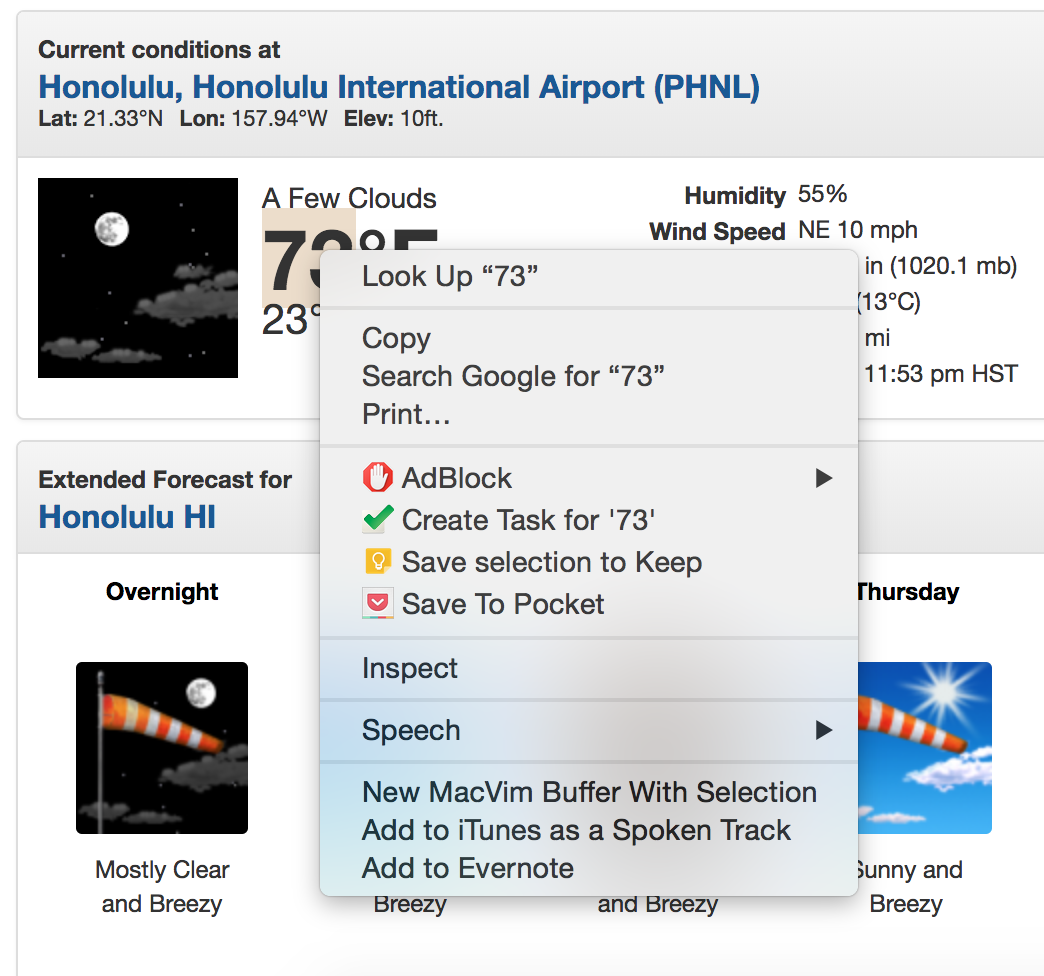
<br />
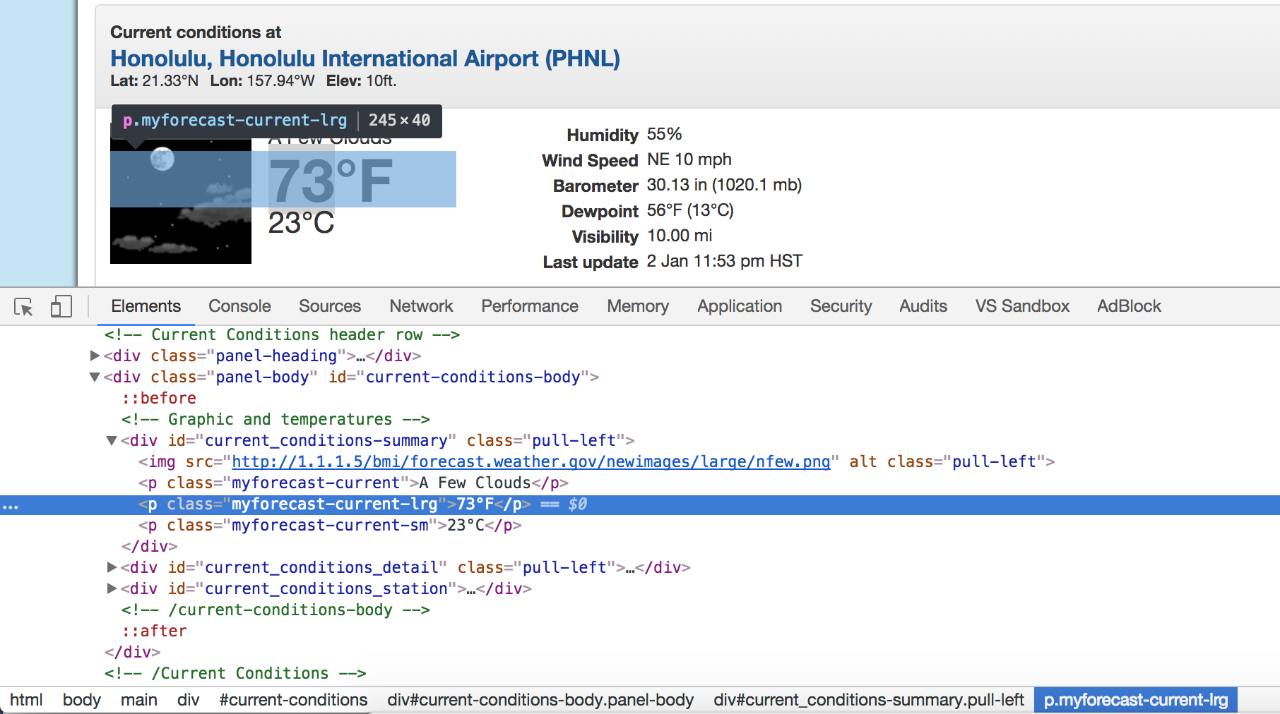

<br><br>
1. (5 points) By using the find function, extract and print out the current temperature from the page.
2. (5 points) Now do the same with the value in Celsius.

In [20]:
### Fill out and print a full sentence describing the temperature in F and C.
temp_F = soup.find('p', class_='myforecast-current-lrg').text
temp_C = soup.find('p', class_='myforecast-current-sm').text

print("It is currently " + temp_F + " (Fahrenheit) at the requested location.")
print("It is currently " + temp_C + " (Celsius) at the requested location.")

It is currently 74°F (Fahrenheit) at the requested location.
It is currently 23°C (Celsius) at the requested location.


3. (20 points) In this exercise we will extract each half day's forecast from the extended forecast on the weather report page. <br>
    a. Find the container for the extended forecast on the weather page we just downloaded. <br>
    b. Make a list with all forecast items (overnight, Wednesday, Wednesday night, etc) <br>
    c. For each time period, print out the name of the period, the short description of the expected weather conditions, and the temperature. 

In [53]:
# For each time period print out something like: 
# Overnight the weather will be mostly clear and breezy and the temperature will be 65F.   
cont = soup.find('div', {'id': 'seven-day-forecast-container'})

cont_list = cont.find('ul', {'id': 'seven-day-forecast-list'})

# loop through the list items and extract the information
for item in cont_list.find_all('li', {'class': 'forecast-tombstone'}):
    period = item.find('p', {'class': 'period-name'}).text
    desc = item.find('p', {'class': 'short-desc'}).text
    formatted_desc = desc.replace('<br>', ', ') #doesn't work
    temp = item.find('p', {'class': 'temp'}).text #needs additional formatting
    
    # print the extracted information
    print(period + " the weather will be mostly " + formatted_desc + " and the temperature will be " + temp + ".")

Today the weather will be mostly ScatteredShowers andWindy and the temperature will be High: 80 °F.
Tonight the weather will be mostly ScatteredShowers andBreezy and the temperature will be Low: 69 °F.
Sunday the weather will be mostly ScatteredShowers andWindy and the temperature will be High: 80 °F.
SundayNight the weather will be mostly ScatteredShowers andWindy and the temperature will be Low: 69 °F.
Monday the weather will be mostly ScatteredShowers andWindy and the temperature will be High: 80 °F.
MondayNight the weather will be mostly ScatteredShowers andWindy and the temperature will be Low: 69 °F.
Tuesday the weather will be mostly ScatteredShowers andWindy and the temperature will be High: 79 °F.
TuesdayNight the weather will be mostly ScatteredShowers andWindy and the temperature will be Low: 69 °F.
Wednesday the weather will be mostly ScatteredShowers andWindy and the temperature will be High: 79 °F.


4. (20 points) Take a list of jobs (e.g.['teacher', 'lawyer', 'data-scientist']). For each job save the html of the result of searching it on indeed. The url of a result page looks like: https://www.indeed.com/q-data-scientist-jobs.html. 

If indeed.com does not work properly for you (e.g., due to a blacklisted IP, which leads to a captcha wall), you can implement your solutions using jobscout24 as an alternative. The url of a result page looks like this in that case: https://www.jobscout24.ch/en/jobs/data%20scientist/

<br>
For each job find the names of the companies from the first result page.  Make a dictionary where the keys are the jobs and value is a list of the company names. 

---

**Hint**: Please use the `headers` argument while you're making the `requests.get` call, otherwise it is likely that indeed.com will directly reject your visit.

You can pass the following dictionary as an argument to the function call, like so:

```python

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

requests.get(your_url, headers=headers)

```
---

In [56]:
import os

jobs = ['teacher', 'lawyer', 'data-scientist']
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

# Create directory if it doesn't exist
if not os.path.exists("jobs_htmls"):
    os.makedirs("jobs_htmls")

for job in jobs:
    with open("jobs_htmls/" + job + ".html", 'w', encoding='utf-8') as f:
        f.write(requests.get("https://www.indeed.com/q-" + job + "-jobs.html", headers=headers).text)

### 5) Headers (25 points)

Every request you send has a so called HTTP header (unrelated to the content of the message), for example to communicate the size of the message, the browser from which the request is coming from, or what kind of response it is expecting back in the response. 

1) Read up on this: What parts does a request contain exactly and what is the purpose of a header? 

2) Look in the browser: Take a URL and find the request header using the developer tools in your browser. (Hint: you will need to look inside 'network'). 

3) If you don’t tell python otherwise, it will use a default header when sending requests. What is this default when you use the requests library?

4) The requests library allows to specify the headers of your request exactly. Set the header of your request (for the  URL you previously picked) to be the one copied from your browser. 

Your chosen URL: ##

Default header of Python requests: ##

Header in your browser: ##

5) Now compare the response headers for the same URL in the browser, and by calling a function on the response object in your code. What differences do you see? 

Response header in your browser: ##

Response header in the response in python: ##

Difference: ##